# Lab Segmentation 1

In [95]:
from commonfunctions import *
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


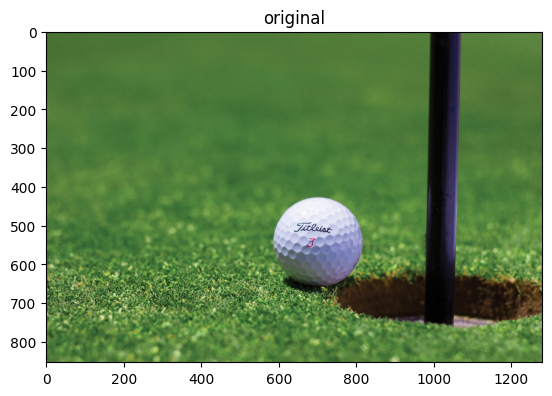

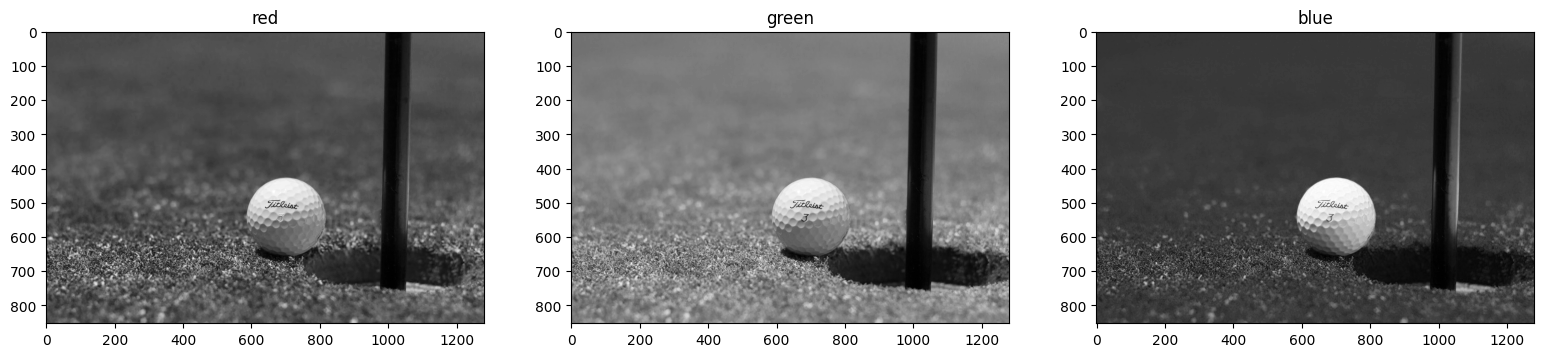

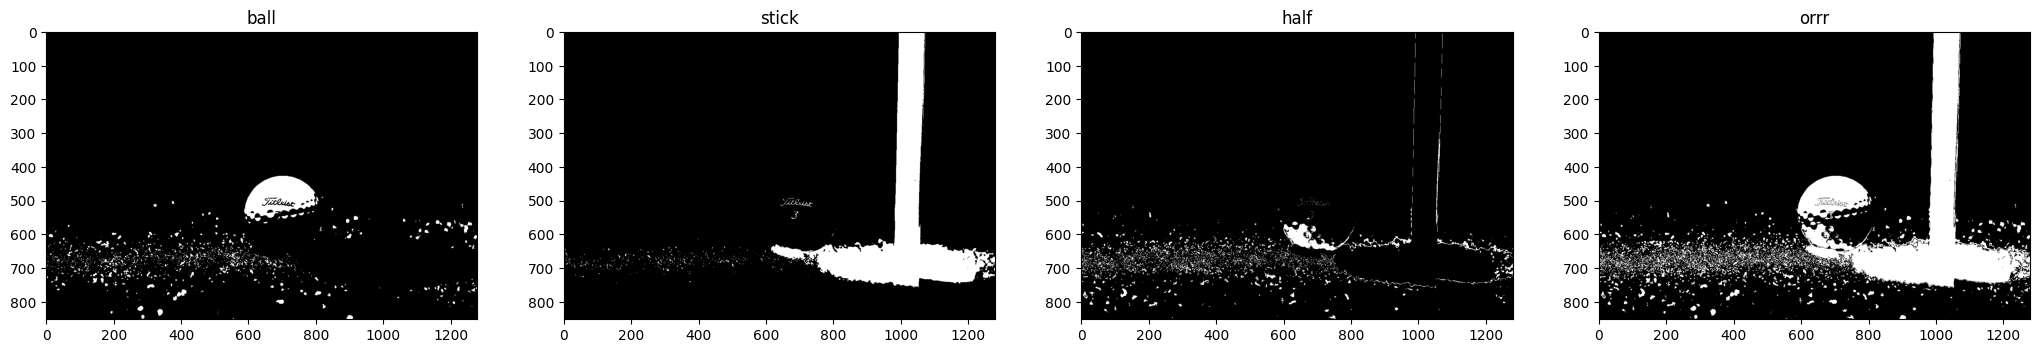

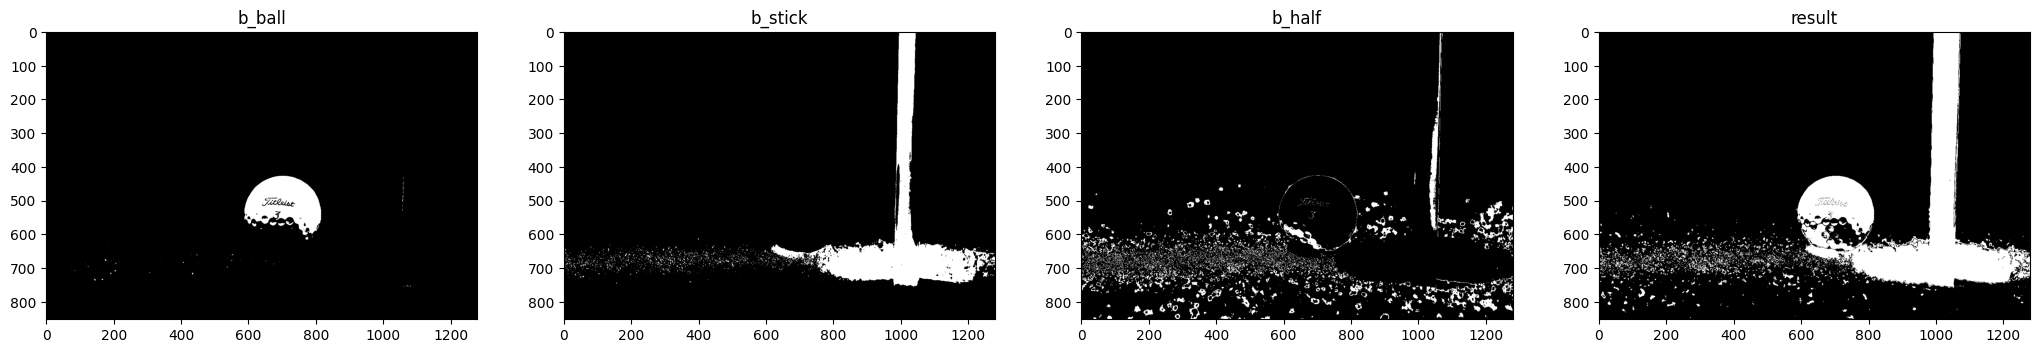

In [108]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
image = io.imread("imgs/exp1/golf.jpeg")

show_images([image],["original"])

image = image.astype(float) /255

red = image[:,:,0]
blue = image[:,:,2]
green = image[:,:,1]

show_images([red,green, blue],["red","green", "blue"])

ball = (green > .7)
stick = (green < .25)
half = np.logical_and((green > .3),(green < .4) )

mask = ( np.logical_or((green < .25) , np.logical_or(  (green > .7) , np.logical_and((green > .3),(green < .4) )) ))

show_images([ball , stick,half, mask],["ball", "stick","half", "orrr"])

b_ball = (blue > .7)
b_stick = (blue < .1)
b_half = np.logical_and((blue > .3),(blue < .4) )

result = ( np.logical_or((blue > .7) , np.logical_or(  (green < .25) , np.logical_and((green > .3),(green < .4) )) ))

show_images([b_ball , b_stick,b_half, result],["b_ball", "b_stick","b_half", "result"])



# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image






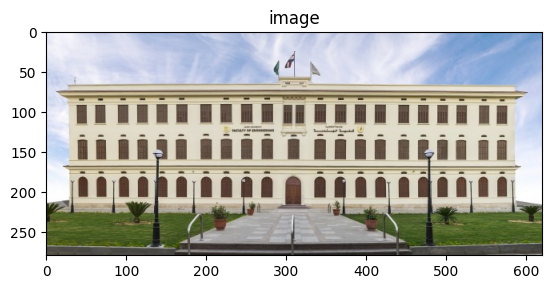

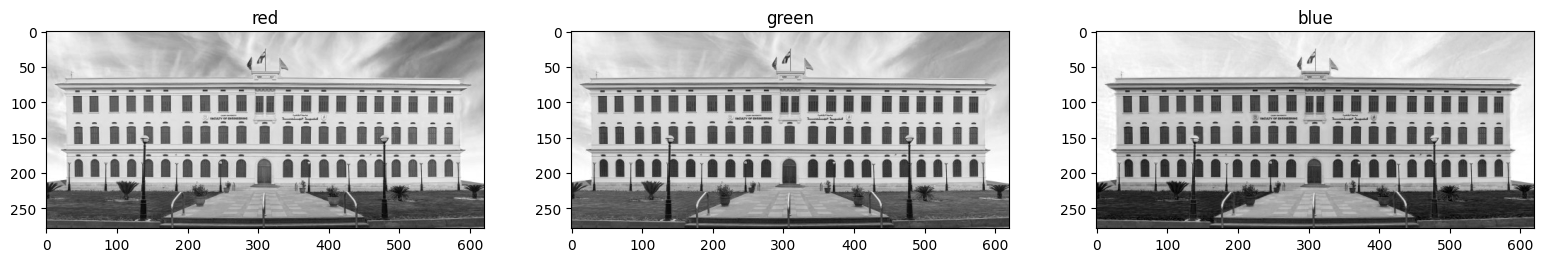

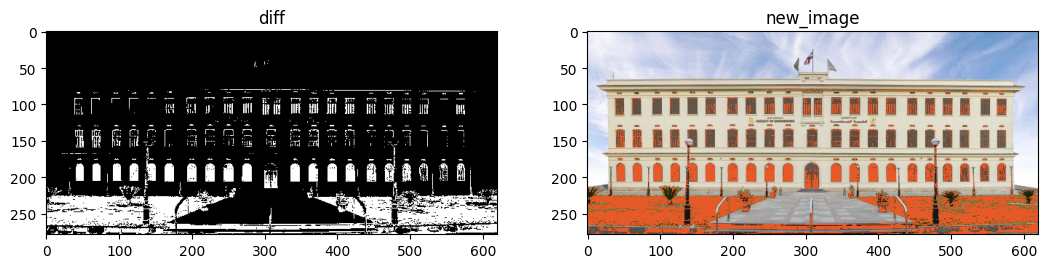

In [244]:
# 1- Get the required RGB color (Using a color picker)

# 2- Read image
image = io.imread("imgs/exp2/cufe.png")
show_images([image],["image"])
image = image.astype(float)



# 3- extract R, G and B channels (as float)

red = image[:,:,0]
blue = image[:,:,2]
green = image[:,:,1]
show_images([red,green, blue],["red","green", "blue"])

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value) 75 , 95 , 35 --- 90 , 65 , 53
red_diff = red - 75
green_diff = green - 95
blue_diff = blue - 35

diff = .1 * (green_diff) + .5 *red_diff + .6 * blue_diff

diff = abs(diff) < 20

new_image = np.copy(image)

new_image[diff,:] = (230,90,40)

new_image = new_image /255

show_images([diff, new_image] , ["diff", "new_image"])

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it
